# Hospital Readmissions Data Analysis and Recommendations for Reduction

### Background
In October 2012, the US government's Center for Medicare and Medicaid Services (CMS) began reducing Medicare payments for Inpatient Prospective Payment System hospitals with excess readmissions. Excess readmissions are measured by a ratio, by dividing a hospital’s number of “predicted” 30-day readmissions for heart attack, heart failure, and pneumonia by the number that would be “expected,” based on an average hospital with similar patients. A ratio greater than 1 indicates excess readmissions.

### Exercise Directions

In this exercise, you will:
+ critique a preliminary analysis of readmissions data and recommendations (provided below) for reducing the readmissions rate
+ construct a statistically sound analysis and make recommendations of your own 

More instructions provided below. Include your work **in this notebook and submit to your Github account**. 

### Resources
+ Data source: https://data.medicare.gov/Hospital-Compare/Hospital-Readmission-Reduction/9n3s-kdb3
+ More information: http://www.cms.gov/Medicare/medicare-fee-for-service-payment/acuteinpatientPPS/readmissions-reduction-program.html
+ Markdown syntax: http://nestacms.com/docs/creating-content/markdown-cheat-sheet
****

In [1]:
%matplotlib inline

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import bokeh.plotting as bkp
from mpl_toolkits.axes_grid1 import make_axes_locatable

In [2]:
# read in readmissions data provided
hospital_read_df = pd.read_csv('data/cms_hospital_readmissions.csv')

****
## Preliminary Analysis

In [3]:
# deal with missing and inconvenient portions of data 
clean_hospital_read_df = hospital_read_df[hospital_read_df['Number of Discharges'] != 'Not Available']
clean_hospital_read_df.loc[:, 'Number of Discharges'] = clean_hospital_read_df['Number of Discharges'].astype(int)
clean_hospital_read_df = clean_hospital_read_df.sort_values('Number of Discharges')

C:\ProgramData\Anaconda3\lib\site-packages\pandas\core\indexing.py:477: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s


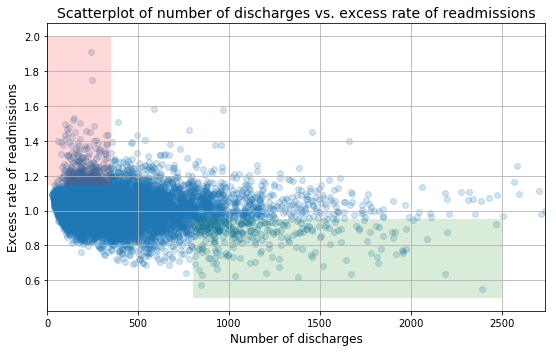

In [4]:
# generate a scatterplot for number of discharges vs. excess rate of readmissions
# lists work better with matplotlib scatterplot function
x = [a for a in clean_hospital_read_df['Number of Discharges'][81:-3]]
y = list(clean_hospital_read_df['Excess Readmission Ratio'][81:-3])

fig, ax = plt.subplots(figsize=(8,5))
ax.scatter(x, y,alpha=0.2)

ax.fill_between([0,350], 1.15, 2, facecolor='red', alpha = .15, interpolate=True)
ax.fill_between([800,2500], .5, .95, facecolor='green', alpha = .15, interpolate=True)

ax.set_xlim([0, max(x)])
ax.set_xlabel('Number of discharges', fontsize=12)
ax.set_ylabel('Excess rate of readmissions', fontsize=12)
ax.set_title('Scatterplot of number of discharges vs. excess rate of readmissions', fontsize=14)

ax.grid(True)
fig.tight_layout()

****

## Preliminary Report

Read the following results/report. While you are reading it, think about if the conclusions are correct, incorrect, misleading or unfounded. Think about what you would change or what additional analyses you would perform.

**A. Initial observations based on the plot above**
+ Overall, rate of readmissions is trending down with increasing number of discharges
+ With lower number of discharges, there is a greater incidence of excess rate of readmissions (area shaded red)
+ With higher number of discharges, there is a greater incidence of lower rates of readmissions (area shaded green) 

**B. Statistics**
+ In hospitals/facilities with number of discharges < 100, mean excess readmission rate is 1.023 and 63% have excess readmission rate greater than 1 
+ In hospitals/facilities with number of discharges > 1000, mean excess readmission rate is 0.978 and 44% have excess readmission rate greater than 1 

**C. Conclusions**
+ There is a significant correlation between hospital capacity (number of discharges) and readmission rates. 
+ Smaller hospitals/facilities may be lacking necessary resources to ensure quality care and prevent complications that lead to readmissions.

**D. Regulatory policy recommendations**
+ Hospitals/facilties with small capacity (< 300) should be required to demonstrate upgraded resource allocation for quality care to continue operation.
+ Directives and incentives should be provided for consolidation of hospitals and facilities to have a smaller number of them with higher capacity and number of discharges.

****
<div class="span5 alert alert-info">
### Exercise

Include your work on the following **in this notebook and submit to your Github account**. 

A. Do you agree with the above analysis and recommendations? Why or why not?
   
B. Provide support for your arguments and your own recommendations with a statistically sound analysis:

   1. Setup an appropriate hypothesis test.
   2. Compute and report the observed significance value (or p-value).
   3. Report statistical significance for $\alpha$ = .01. 
   4. Discuss statistical significance and practical significance. Do they differ here? How does this change your recommendation to the client?
   5. Look at the scatterplot above. 
      - What are the advantages and disadvantages of using this plot to convey information?
      - Construct another plot that conveys the same information in a more direct manner.



You can compose in notebook cells using Markdown: 
+ In the control panel at the top, choose Cell > Cell Type > Markdown
+ Markdown syntax: http://nestacms.com/docs/creating-content/markdown-cheat-sheet
</div>
****

In [5]:
#A 

#I do not agree with the preliminary analysis. There is hardly a significant statistical correlation between
#the number of discharges and excess readmissions rate. There are some outliers which may make the 
#scatter plot appear to have a negative correlation, but the vast majority of data points lie outside
#of the shaded boxes used in this argument. 
#the statistics in B are not significant: 1.023 is barely above 1; 0.978 is barely below 1. "63% is above ... and 44% is below..
#says nothing about the significance of the statistic (e.g. 1.000001 is technically above 1, but not significant)
#the shaded boxes pick out outliers which make it appear as if there is a significant difference between the two regions

In [96]:
import math
from scipy.stats import norm

In [45]:
pairs = clean_hospital_read_df[['Excess Readmission Ratio','Number of Discharges']].dropna()
pair['Number of Discharges']

In [ ]:
#1
#null hypothesis: there is no correlation between the variables (i.e. slope of fitted line B_1 = 0)
#alternative hypothesis: there is a negative correlation between the variables (i.e. slope of fitted line B_1 < 0)

In [87]:
params = np.polyfit(pairs['Number of Discharges'],pairs['Excess Readmission Ratio'],deg=1)
params
B_1_estimate = params[0]
B_1_estimate
#params[0] is our statistic (estimator) for B_1

-2.9010517330569044e-05

In [88]:
# params[0]*x + params[1] is the fitted line: y = B_0*x + B_1

pairs['Residual'] = (params[0]*pairs['Number of Discharges'] + params[1]) - pairs['Excess Readmission Ratio']
pairs['Residual_sq'] = pairs['Residual']**2
SD_unbiased_estimator = math.sqrt(pairs['Residual_sq'].sum()/(len(pairs)-2))
SD_unbiased_estimator
#SD_unbiased_estimator is the estimator of SD of the eps error term: y = B_1*x + B_0 + eps
# eps ~ N(0,SD)

0.09153100464258504

In [92]:
denom = math.sqrt(((pairs['Number of Discharges'] - pairs['Number of Discharges'].mean())**2).sum())
B_1_estimate_SD = SD_unbiased_estimator/denom
B_1_estimate_SD

#B_1_estimate ~ N(B_1,SD_unbiased_estimator/(sum(x_i - x_bar)^2))

#SD for B_1_estimate ends up being very small because the discharges vary widely

2.764912734911062e-06

In [95]:
denom

33104.48228143782

In [97]:
#standardize B_1_estimate under the null hypothesis (assuming normal distribution)
standard_stat = (B_1_estimate - 0)/(B_1_estimate_SD)
standard_stat

-10.492380813422749

In [101]:
#2

norm.cdf(standard_stat)
#pvalue

#3
#our calculated pvalue is well below the significance level of alpha = 0.01, so we should reject the null hypothesis
#that there is no correlation, i.e. accept the alternative hypothesis: there is a negative correlation between
#the variables

4.6819330675845203e-26

In [ ]:
#4

#there is a difference here. although the calculated statistic for the slope of the fitted line is very close to 0,
#the standard deviation is much smaller and so the result of the hypothesis test suggests that there is sufficient
#evidence to reject the idea that there is no correlation between the variables. practically speaking, however,
#it is still more reasonable to think that there is no correlation. the result of this hypothesis test is due to the 
#fact that we are dealing with numbers on the order of 10^-5 and 10^-7; even a very small change in denominator would
#greatly change the result of the hypothesis test. I stand by my original argument that there is no practical
#correlation between the variables. 

In [ ]:
#5

#advantages: it is much easier to visualize any possible relationships between variables when we visualize our data
#however, as was done here, it is also possible the present the data in such a way that we make apparent relationships
#in the data that do not actually exist. we can "skew" the data to suggest a certain narrative

In [108]:
x_fitted = np.linspace(0,2700,100)
y_fitted = x_fitted*params[0] + params[1]

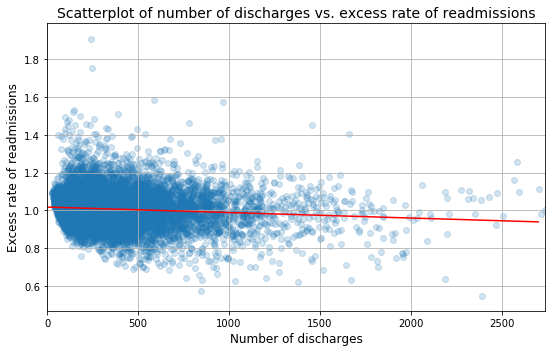

In [111]:
x = [a for a in clean_hospital_read_df['Number of Discharges'][81:-3]]
y = list(clean_hospital_read_df['Excess Readmission Ratio'][81:-3])

fig, ax = plt.subplots(figsize=(8,5))
ax.scatter(x, y,alpha=0.2)
ax.plot(x_fitted,y_fitted,color='r')


ax.set_xlim([0, max(x)])
ax.set_xlabel('Number of discharges', fontsize=12)
ax.set_ylabel('Excess rate of readmissions', fontsize=12)
ax.set_title('Scatterplot of number of discharges vs. excess rate of readmissions', fontsize=14)

ax.grid(True)
fig.tight_layout()

#the red line is the fitted line over the scatter plot; there is a slight negative correlation, but, again, 
#there is no SIGNIFICANT correlation. 